Primeiras 5 linhas do DataFrame:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies      

C:\Users\Leonardo_luis_Carlos\AppData\Local\Temp\ipykernel_4168\745545709.py:30: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title='Resultado', labels=['Não-Diabético', 'Diabético'])


Histograma de idade salvo como 'age_histogram.png'
Box plot de glicose salvo como 'glucose_outcome_boxplot.png'
Mapa de calor salvo como 'correlation_heatmap.png'
Scatter plot de IMC e glicose salvo como 'bmi_glucose_outcome_scatter_plot.png'
Violin plot de glicose salvo como 'glucose_outcome_violin_plot.png'
Bar plot de idade e resultado salvo como 'age_outcome_bar_plot.png'


C:\Users\Leonardo_luis_Carlos\AppData\Local\Temp\ipykernel_4168\745545709.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group = df.groupby(age_group)['Outcome'].mean().reset_index()


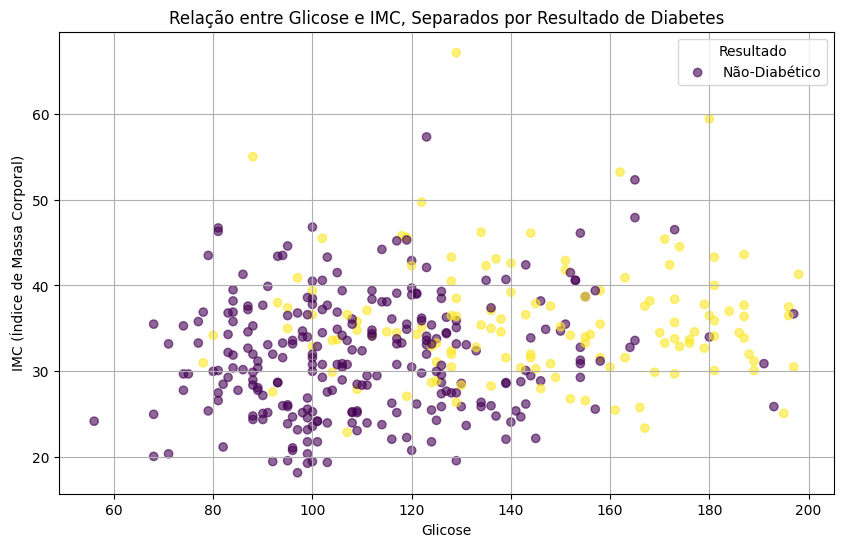

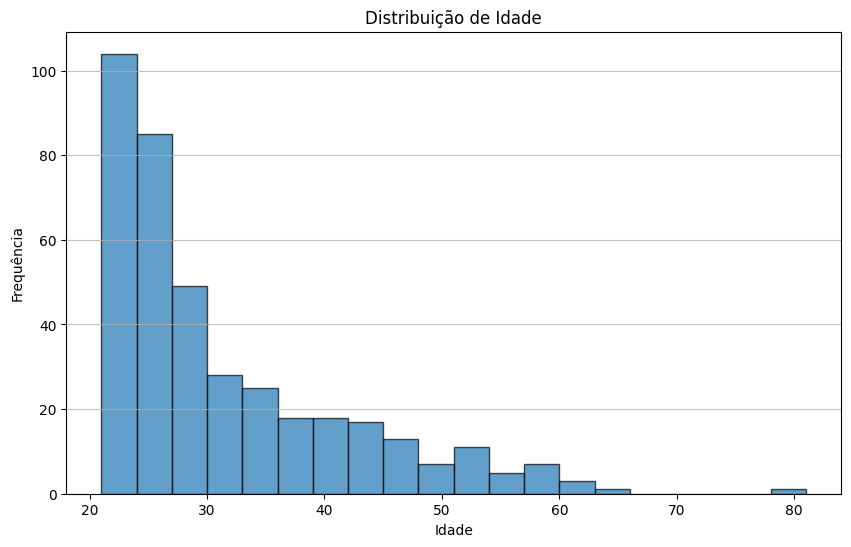

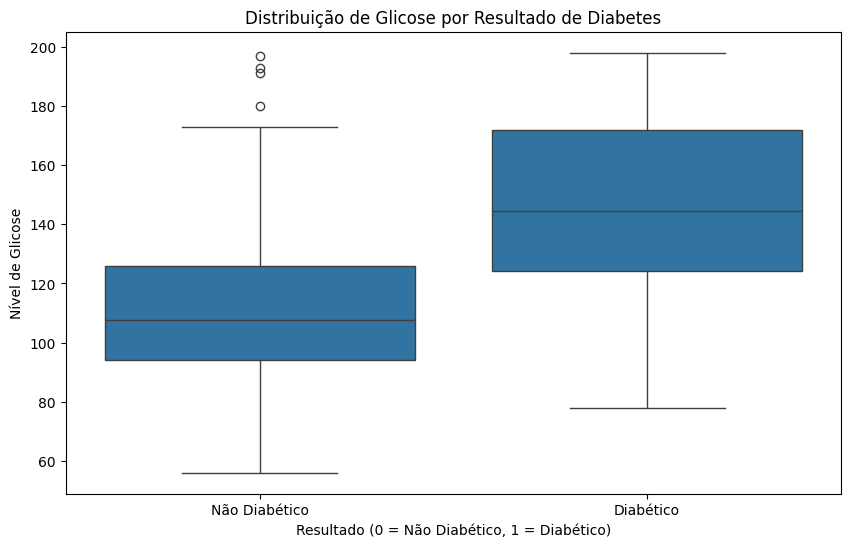

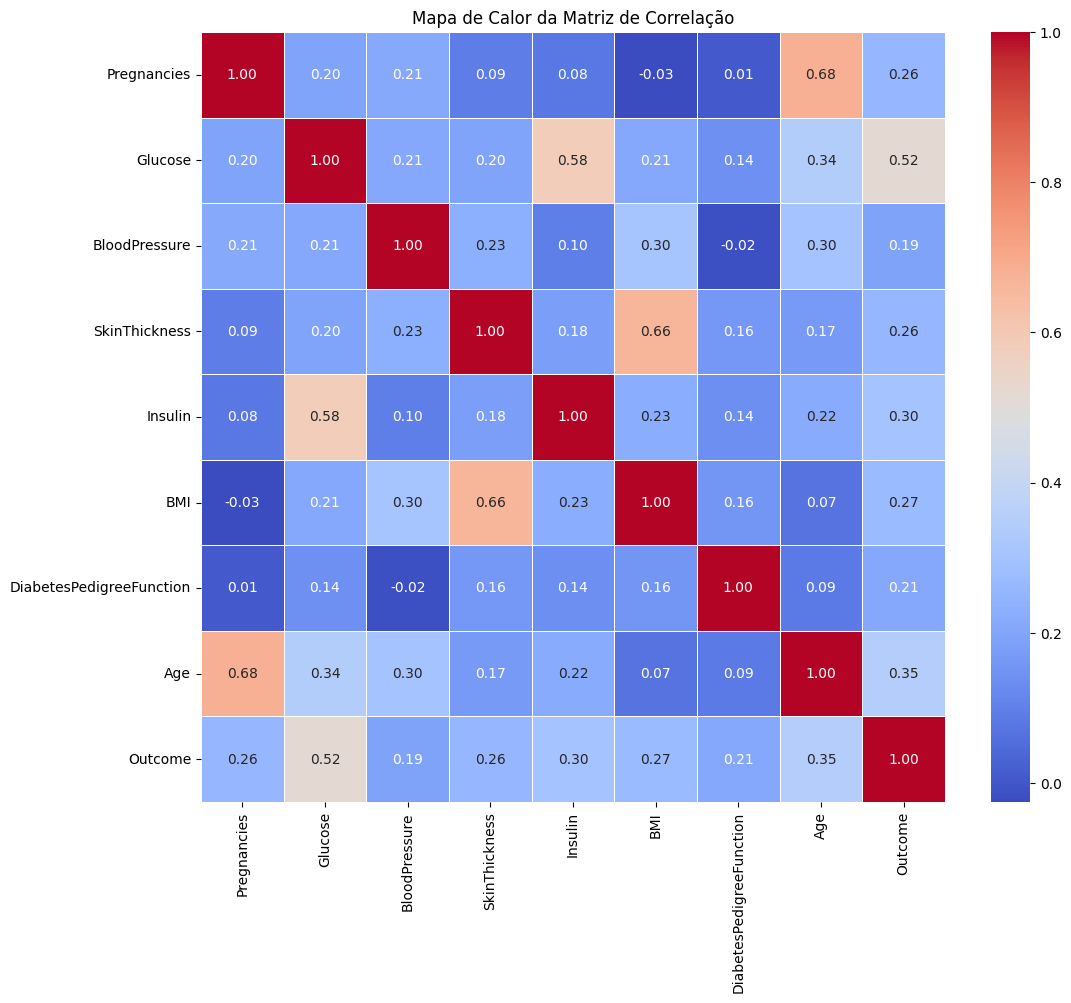

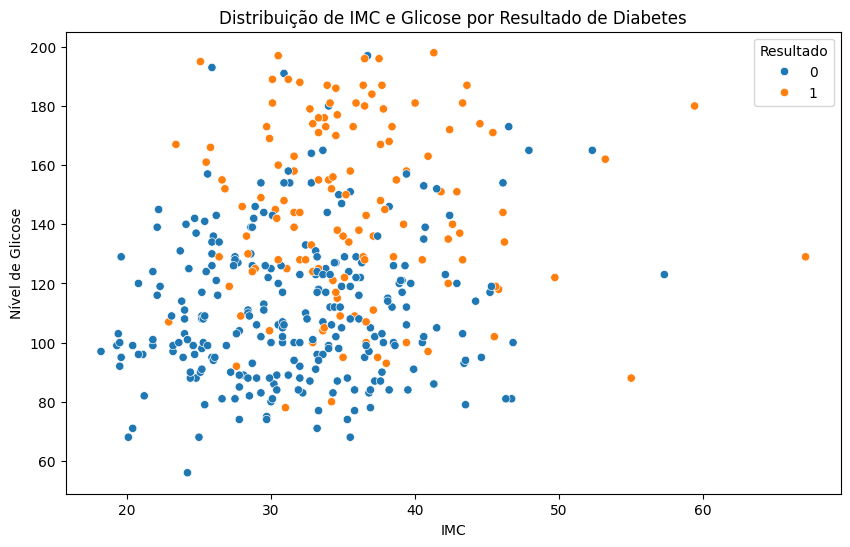

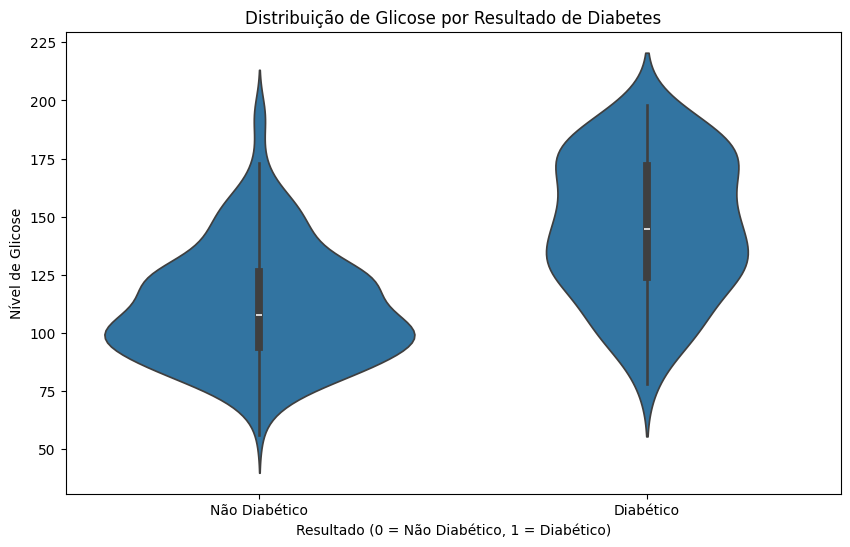

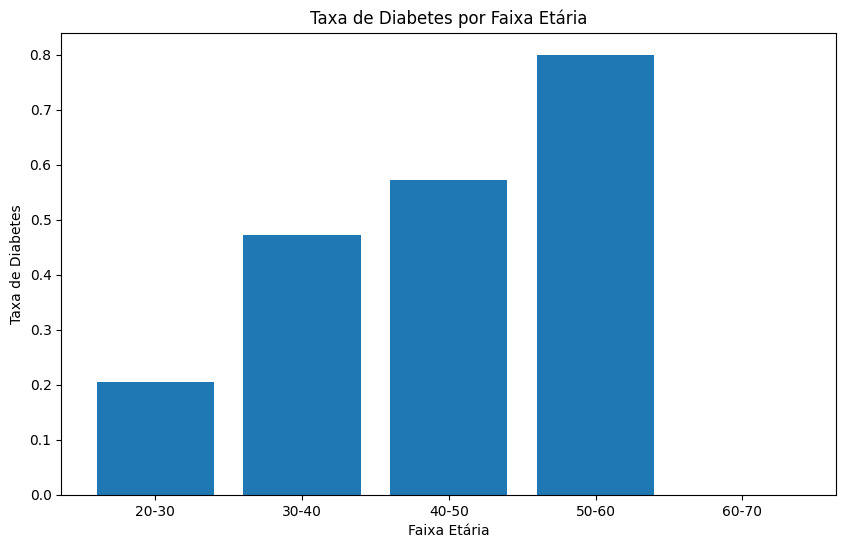

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo CSV em um DataFrame do pandas
df = pd.read_csv('diabetes.csv')

#Remove os null ou zero
df = df[(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] != 0).all(axis=1)]


# Exibe as primeiras 5 linhas do DataFrame
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

# Exibe informações sobre o DataFrame (tipos de dados, contagem de valores nulos, etc.)
print("\nInformações do DataFrame:")
print(df.info())

# Exibe estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas:")
print(df.describe())

# Cria um gráfico de dispersão de 'Glucose' vs 'BMI', colorido por 'Outcome'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='viridis', alpha=0.6)
plt.title('Relação entre Glicose e IMC, Separados por Resultado de Diabetes')
plt.xlabel('Glicose')
plt.ylabel('IMC (Índice de Massa Corporal)')
plt.legend(*scatter.legend_elements(), title='Resultado', labels=['Não-Diabético', 'Diabético'])
plt.grid(True)
plt.savefig('glucose_bmi_outcome_scatter_plot.png')




# 1. Histograma para a coluna 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.savefig('age_histogram.png')
print("Histograma de idade salvo como 'age_histogram.png'")

# 2. Box Plot de 'Glucose' por 'Outcome'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Distribuição de Glicose por Resultado de Diabetes')
plt.xlabel('Resultado (0 = Não Diabético, 1 = Diabético)')
plt.ylabel('Nível de Glicose')
plt.xticks(ticks=[0, 1], labels=['Não Diabético', 'Diabético'])
plt.savefig('glucose_outcome_boxplot.png')
print("Box plot de glicose salvo como 'glucose_outcome_boxplot.png'")

# 3. Mapa de Calor da Correlação
# This code generates a heatmap to visualize the correlation between different columns in a DataFrame (df). Here's a succinct explanation:

# It creates a new figure with a specified size.
# It calculates the correlation matrix (corr_matrix) of the DataFrame using the corr() method.
# It uses seaborn's heatmap() function to create a heatmap of the correlation matrix. The heatmap is annotated with correlation coefficients rounded to two decimal places.
# It sets the title of the heatmap and saves it as an image file named "correlation_heatmap.png".
# It prints a message indicating that the heatmap has been saved.
# In summary, this code helps to visualize the relationships between different columns in a DataFrame by creating a heatmap of correlation coefficients.
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação')
plt.savefig('correlation_heatmap.png')
print("Mapa de calor salvo como 'correlation_heatmap.png'")

# 4. Scatter Plot de 'BMI' por 'Outcome'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df)
plt.title('Distribuição de IMC e Glicose por Resultado de Diabetes')
plt.xlabel('IMC')
plt.ylabel('Nível de Glicose')
plt.legend(title='Resultado')
plt.savefig('bmi_glucose_outcome_scatter_plot.png')
print("Scatter plot de IMC e glicose salvo como 'bmi_glucose_outcome_scatter_plot.png'")

# 5. Violin Plot de 'Glucose' por 'Outcome'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.title('Distribuição de Glicose por Resultado de Diabetes')
plt.xlabel('Resultado (0 = Não Diabético, 1 = Diabético)')
plt.ylabel('Nível de Glicose')
plt.xticks(ticks=[0, 1], labels=['Não Diabético', 'Diabético'])
plt.savefig('glucose_outcome_violin_plot.png')
print("Violin plot de glicose salvo como 'glucose_outcome_violin_plot.png'")

# 6. Bar Plot de 'Outcome' por 'Age'
plt.figure(figsize=(10, 6))
age_group = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])
df_group = df.groupby(age_group)['Outcome'].mean().reset_index()
plt.bar(df_group['Age'], df_group['Outcome'])
plt.title('Taxa de Diabetes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Diabetes')
plt.savefig('age_outcome_bar_plot.png')
print("Bar plot de idade e resultado salvo como 'age_outcome_bar_plot.png'")




C:\Users\Leonardo_luis_Carlos\AppData\Roaming\Python\Python310\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.stats import gaussian_kde


Histograma de idade salvo como 'age_histogram.png'
Box plot de glicose salvo como 'glucose_outcome_boxplot.png'
Mapa de calor salvo como 'correlation_heatmap.png'


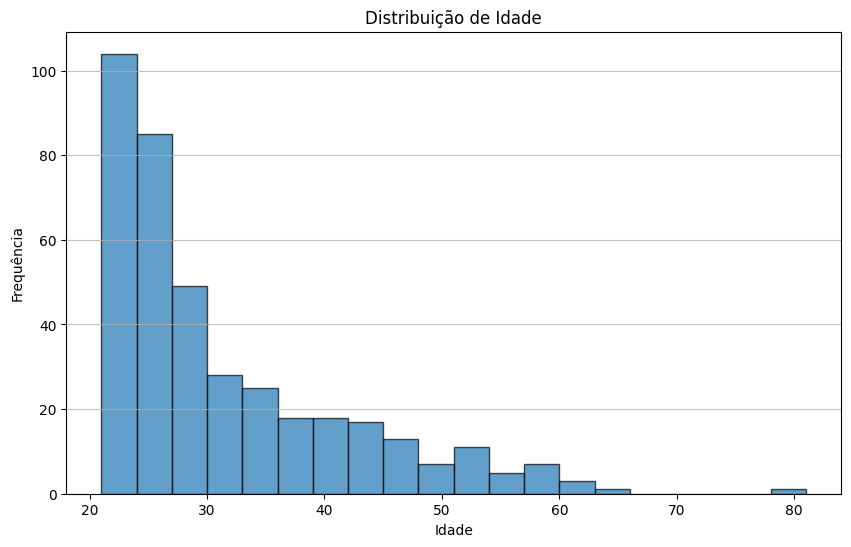

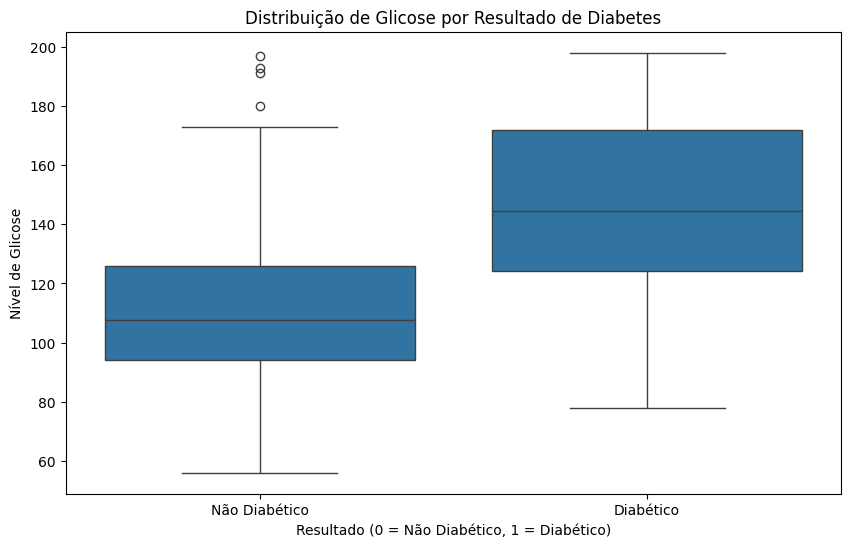

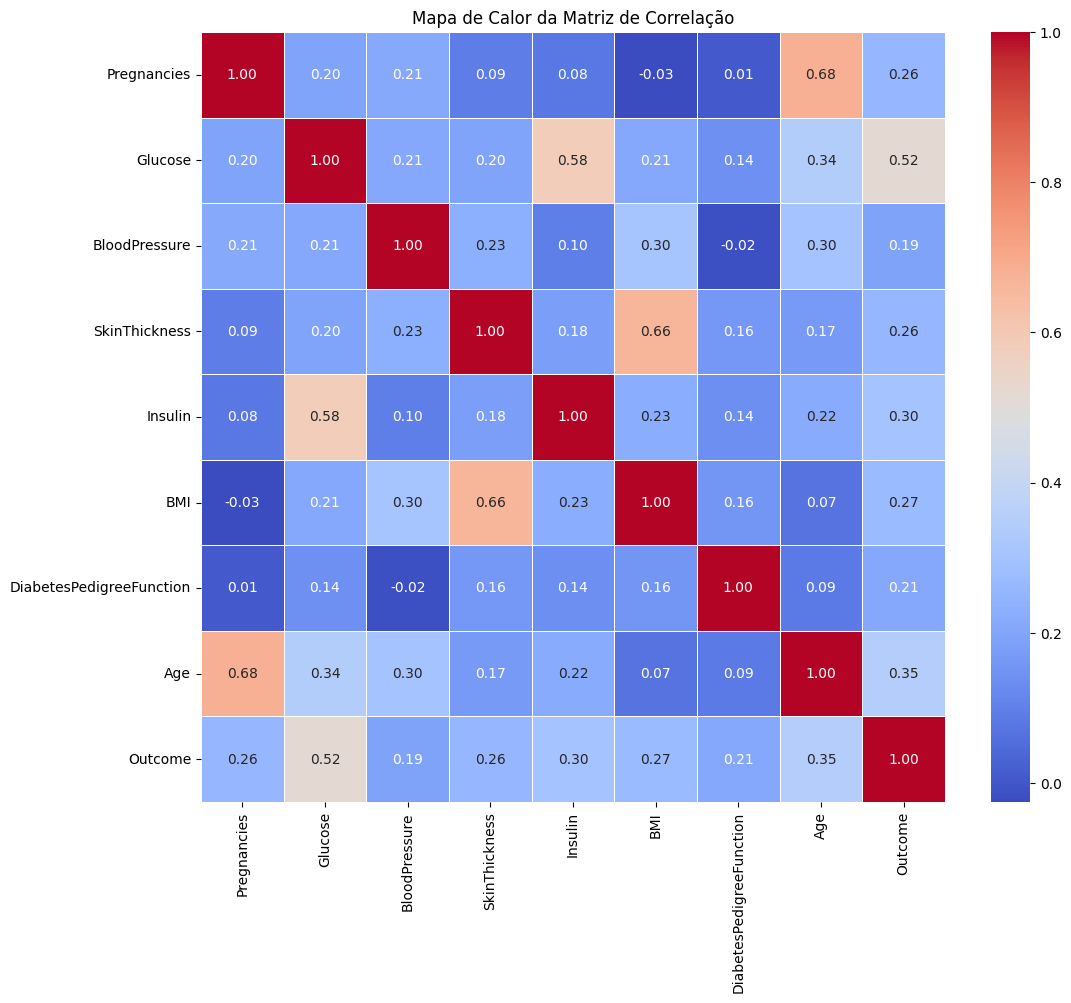

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Histograma para a coluna 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.savefig('age_histogram.png')
print("Histograma de idade salvo como 'age_histogram.png'")

# 2. Box Plot de 'Glucose' por 'Outcome'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Distribuição de Glicose por Resultado de Diabetes')
plt.xlabel('Resultado (0 = Não Diabético, 1 = Diabético)')
plt.ylabel('Nível de Glicose')
plt.xticks(ticks=[0, 1], labels=['Não Diabético', 'Diabético'])
plt.savefig('glucose_outcome_boxplot.png')
print("Box plot de glicose salvo como 'glucose_outcome_boxplot.png'")

# 3. Mapa de Calor da Correlação
# This code generates a heatmap to visualize the correlation between different columns in a DataFrame (df). Here's a succinct explanation:

# It creates a new figure with a specified size.
# It calculates the correlation matrix (corr_matrix) of the DataFrame using the corr() method.
# It uses seaborn's heatmap() function to create a heatmap of the correlation matrix. The heatmap is annotated with correlation coefficients rounded to two decimal places.
# It sets the title of the heatmap and saves it as an image file named "correlation_heatmap.png".
# It prints a message indicating that the heatmap has been saved.
# In summary, this code helps to visualize the relationships between different columns in a DataFrame by creating a heatmap of correlation coefficients.
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação')
plt.savefig('correlation_heatmap.png')
print("Mapa de calor salvo como 'correlation_heatmap.png'")

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('diabetes.csv')
print(df.size)
#Calculate how many rows have missing values
missing_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows}")

# Remove rows with missing values
df = df.dropna()
print("Size apos clean" + str(df.size))

# Define features (X) and target (y). Y Pode ser 0 ou 1
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



6912
Number of rows with missing values: 0
Size apos clean6912
Accuracy: 0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
[[77 22]
 [21 34]]


In [13]:
# Create a new dataframe with the features of a new patient
new_patient = pd.DataFrame({
    'Pregnancies': [5],
    'Glucose': [190],
    'BloodPressure': [80],
    'SkinThickness': [30],
    'Insulin': [200],
    'BMI': [35],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [40]
})
print("Testing new patient with features: ")
print(new_patient)


# Make a prediction on the new patient
prediction = model.predict(new_patient)
print("Prediction:", prediction)

Testing new patient with features: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            5      190             80             30      200   35   

   DiabetesPedigreeFunction  Age  
0                       0.5   40  
Prediction: [1]
